In [ ]:
!pip install datatable
!pip install explainerdashboard
!pip install opendatasets

In [ ]:
#importing the dataset
import opendatasets as od
from pathlib import Path

#dataset arrangements
import pandas as pd
import numpy as np

#model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#XAI
import datatable as dt # data table factory
from sklearn.metrics import f1_score
import explainerdashboard as expdb
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard import InlineExplainer
from explainerdashboard.custom import (ImportancesComposite,
                                       IndividualPredictionsComposite,
                                       WhatIfComposite,
                                       ShapDependenceComposite,
                                       ShapInteractionsComposite,
                                       DecisionTreesComposite)

#plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`


https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?datasetId=727551&sortBy=voteCount

In [ ]:
od.download("https://www.kaggle.com/andrewmvd/heart-failure-clinical-data") #main dataset

Skipping, found downloaded files in "./heart-failure-clinical-data" (use force=True to force download)


In [ ]:
df_dir=Path("/content/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
df=pd.read_csv(df_dir)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
X = df[df.columns.difference(['DEATH_EVENT'])]
y = df["DEATH_EVENT"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression_prediction = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_prediction)
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* logistic_regression_accuracy))

Accuracy of Logistic Regression is :  86.67%


<Figure size 432x288 with 0 Axes>

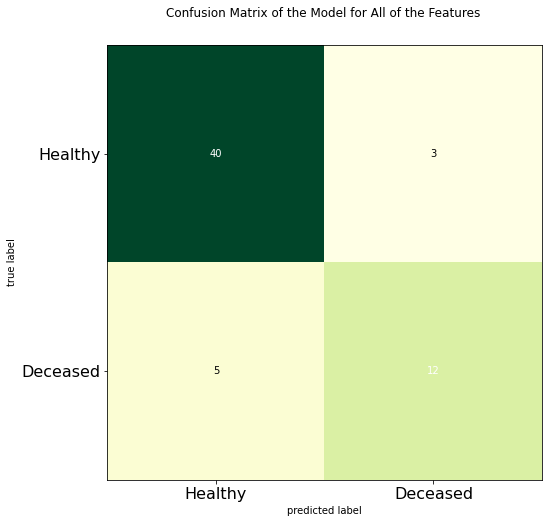

In [ ]:
cm = confusion_matrix(y_test, logistic_regression_prediction)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.YlGn)
plt.title("Confusion Matrix of the Model for All of the Features ")
plt.xticks(range(2), ["Healthy","Deceased"], fontsize=16)
plt.yticks(range(2), ["Healthy","Deceased"], fontsize=16)
plt.show()

In [ ]:
#Creating the explainer object
explainer = ClassifierExplainer(logistic_regression, X_test, y_test,model_output='logodds')

#Creating individual component plants using Inexplainer
ie = InlineExplainer(explainer)

#SHAP overview
ie.shap.overview()

#SHAP interactions
ie.shap.interaction_dependence()

#Model Stats
ie.classifier.model_stats()

#SHAP contribution
ie.shap.contributions_graph()

#SHAP dependence
ie.shap.dependence()

Note: shap values for shap='linear' get calculated against X_background, but paramater X_background=None, so using X instead...
Generating self.shap_explainer = shap.LinearExplainer(model, X)...
Calculating shap values...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
db = ExplainerDashboard(explainer, 
                        title="Heart Failure Prediction",
                        shap_interaction=False,
                        )
db.run(port=8050)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.2:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
x_log = df[['time','ejection_fraction','serum_creatinine']]
y_log = df["DEATH_EVENT"]
x_log_train,x_log_test,y_log_train,y_log_test = train_test_split(x_log,y_log, test_size=0.2, random_state=2)
log_reg = LogisticRegression()
log_reg.fit(x_log_train, y_log_train)
log_reg_pred = log_reg.predict(x_log_test)
log_reg_acc = accuracy_score(y_log_test, log_reg_pred)
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  90.00%


<Figure size 432x288 with 0 Axes>

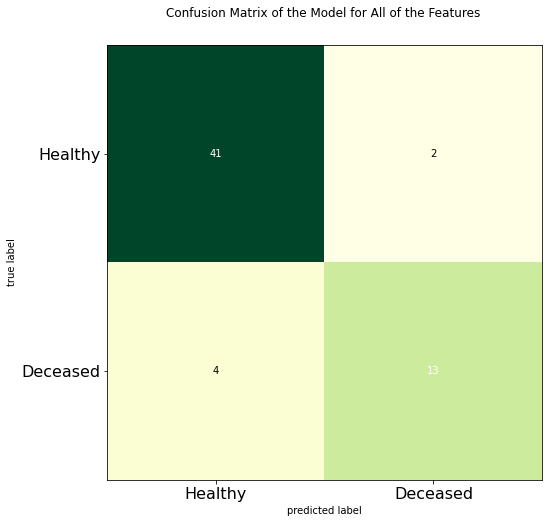

In [ ]:
cm = confusion_matrix(y_log_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.YlGn)
plt.title("Confusion Matrix of the Model for All of the Features ")
plt.xticks(range(2), ["Healthy","Deceased"], fontsize=16)
plt.yticks(range(2), ["Healthy","Deceased"], fontsize=16)
plt.show()

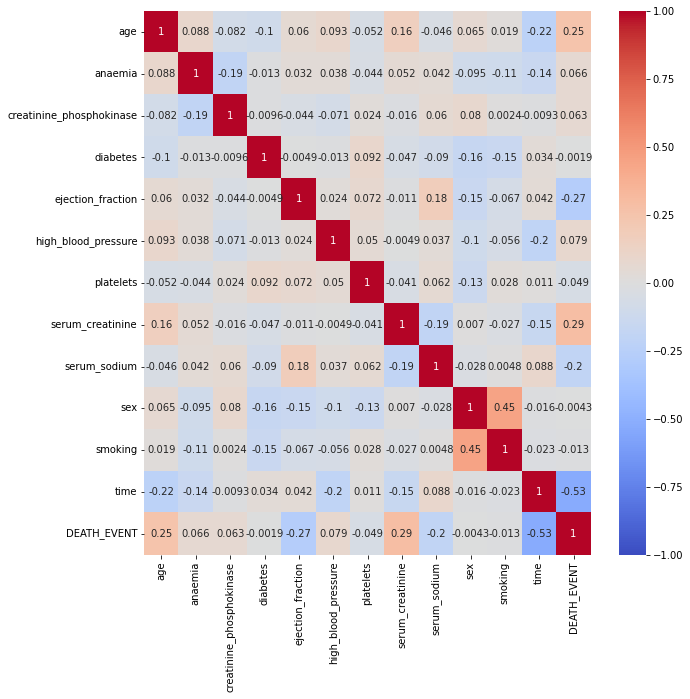

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);